In [1]:
import helperfunctions as hf
# Define circuit parameters
num_sites = 2
J_input = 4
U_input = 1.0

r_cycles = 2
s_iterations = 2

circuit, target, time, si_time = hf.create_rodeo_circuit(num_sites = 2, J_input = 4.0, U_input = 1.0, 
                                                      cycles = r_cycles, super_iterations=s_iterations, trotter_steps=5)


import numpy as np
from qiskit_aer.primitives import Sampler

# Scan energies
energymin, energymax = -10, 10
stepsize = 0.1
gamma = 1
timeresamples = 10 
shots_per_same_time = 1024

targetenergies = np.linspace(energymin, energymax, int((energymax-energymin)/stepsize))
data = []

for energy in targetenergies:
   targ_energy = {target: energy}
   print("Executing for Target Energy:", targ_energy)
   energy_runs = []
   
   for _ in range(timeresamples):
       # Random time samples
       tsamples = ((1/gamma) * np.random.randn(r_cycles)).tolist()
       
       # Set parameters
       params = {
           **dict(zip(time, tsamples)), 
           **targ_energy,
           **hf.generate_superiteration_times(tsamples, s_iterations, si_time)
       }
       
       # Run circuit
       circuit_bound = circuit.assign_parameters(params)
       sampler = Sampler()
       result = sampler.run(circuit_bound).result().quasi_dists
       energy_runs.extend(result)
       
   # Average results for this energy
   combined = {}
   for run in energy_runs:
       for key, value in run.items():
           combined[key] = combined.get(key, 0) + value
           
   data.append({k: v/timeresamples for k, v in combined.items()})

# Extract zero probabilities 
zero_probs = [d.get(0, 0.0) for d in data]

Executing for Target Energy: {Parameter($E_\odot$): -10.0}
Executing for Target Energy: {Parameter($E_\odot$): -9.899497487437186}
Executing for Target Energy: {Parameter($E_\odot$): -9.798994974874372}
Executing for Target Energy: {Parameter($E_\odot$): -9.698492462311558}
Executing for Target Energy: {Parameter($E_\odot$): -9.597989949748744}
Executing for Target Energy: {Parameter($E_\odot$): -9.49748743718593}
Executing for Target Energy: {Parameter($E_\odot$): -9.396984924623116}
Executing for Target Energy: {Parameter($E_\odot$): -9.296482412060302}
Executing for Target Energy: {Parameter($E_\odot$): -9.195979899497488}
Executing for Target Energy: {Parameter($E_\odot$): -9.095477386934673}
Executing for Target Energy: {Parameter($E_\odot$): -8.99497487437186}
Executing for Target Energy: {Parameter($E_\odot$): -8.894472361809045}
Executing for Target Energy: {Parameter($E_\odot$): -8.793969849246231}
Executing for Target Energy: {Parameter($E_\odot$): -8.693467336683417}
Executi

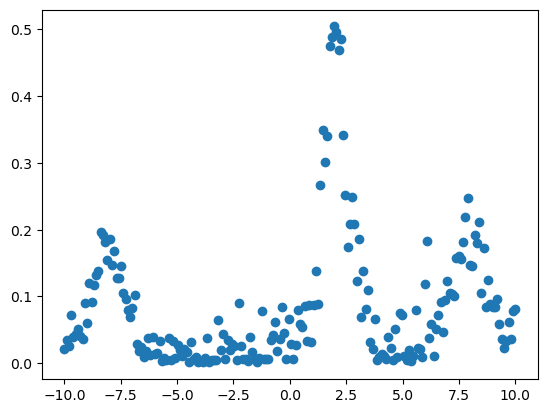

In [2]:
import matplotlib.pyplot as plt

plt.scatter(targetenergies, zero_probs)